# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

author: **Jinhui HU**

## Table of contents
* [Introduction: Cardiovascular disease](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [Reference](#reference)

## 1 Introduction: Cardiovascular disease <a name="introduction"></a>

Cardiovascular diseases are the leading cause of death in all areas of the world except Africa. Together CVD resulted in 17.9 million deaths (32.1%) in 2015, up from 12.3 million (25.8%) in 1990.[[1]](#reference) 

In this project we will try to predict whether a person have cardiovascular disease or not. Specifically, this report will be targeted to doctors interested in using machine learning to predict a patient have ardiovascular disease or not based on some information.

We will use two machine learning algorithms including logistic model and decision tree to build models and use them to predict.

## 2 Data <a name="data"></a>

Most data can be found in this Kaggle datasets [here]('https://www.kaggle.com/sulianova/cardiovascular-disease-dataset').[[2]](#reference)  These data include 3 different types:
* Objective: factual information;
* Examination: results of medical examination;
* Subjective: information given by the patient.

And there are some descriptions of the features:

| Features | Type | Names | Type of data |
| ------------- |:-------------:|:-------------:| -----:|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

### 2.1 Data Preprocessing

In [2]:
#Import the modules we need

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#read data
data = pd.read_csv('cardio_train.csv',sep=';')
x = data.copy()
x.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


We don't need the id column, so we drop it.

In [6]:
x.drop("id",axis=1,inplace=True)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Draw box charts of blood pressure, height and weight.

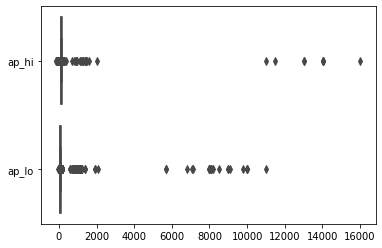

In [8]:
sns.boxplot(data=x.iloc[:,4:6], orient='h', palette='Set1')

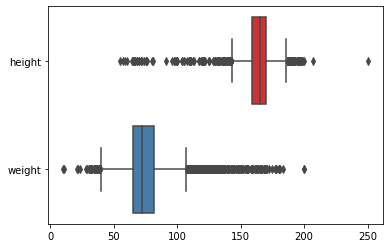

In [9]:
sns.boxplot(data=x.iloc[:,2:4], orient='h', palette='Set1')

In [10]:
x_list = ['height', 'weight', 'ap_hi', 'ap_lo']
boundary = pd.DataFrame(index=['lower_bound','upper_bound']) # We created an empty dataframe
for i in x_list:
    Q1 = x[i].quantile(0.25)
    Q3 = x[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[i] = [lower_bound, upper_bound ]
boundary

,height,weight,ap_hi,ap_lo
lower_bound,142.5,39.5,90.0,65.0
upper_bound,186.5,107.5,170.0,105.0


### ap_hi and ap_lo symbolizes high blood pressure, the high rate of disease is consistent with real life. Obesity also may cause disease. However, the boundary seems to be normal, so I decide to drop those impossible data.

In [11]:
x.drop(x[(x['ap_hi'] > 240) | (x['ap_hi'] < 45)].index,inplace=True)
x.drop(x[(x['ap_lo'] > 180)| (x['ap_lo'] < 30)].index,inplace=True)
x.drop(x[(x['height'] > 200) | (x['height'] < 100)].index,inplace=True)
x.drop(x[(x['weight'] > 150)| (x['weight'] < 30)].index,inplace=True)

In [12]:
x.shape

(68692, 12)

Now the box charts become:

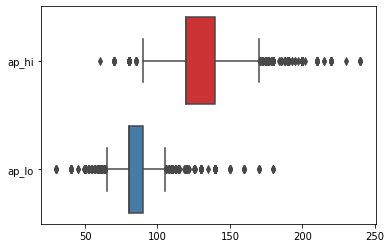

In [13]:
sns.boxplot(data=x.iloc[:,4:6], orient='h', palette='Set1')

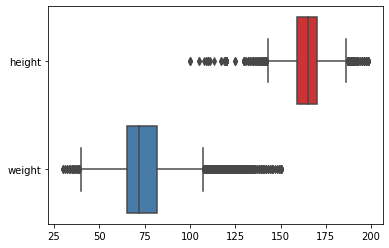

In [14]:
sns.boxplot(data=x.iloc[:,2:4], orient='h', palette='Set1')

In [15]:
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000
mean,19464.901881,1.348658,164.394311,74.054343,126.605573,81.367932,1.364686,1.225936,0.088002,0.053572,0.803325,0.494847
std,2467.704553,0.476549,7.961412,14.084327,16.749292,9.656481,0.678956,0.571909,0.283299,0.225174,0.397487,0.499977
min,10798.000000,1.000000,100.000000,30.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,198.000000,150.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### 2.2 Feature Engineering

In [16]:
x['age'] = (x['age'] / 365).round().astype('int')
x['BMI'] = x['weight']/((x['height']/100)**2)
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000
mean,53.327957,1.348658,164.394311,74.054343,126.605573,81.367932,1.364686,1.225936,0.088002,0.053572,0.803325,0.494847,27.446672
std,6.766464,0.476549,7.961412,14.084327,16.749292,9.656481,0.678956,0.571909,0.283299,0.225174,0.397487,0.499977,5.216359
min,30.000000,1.000000,100.000000,30.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213
max,65.000000,2.000000,198.000000,150.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,86.776860


In [18]:
y = x.loc[:,'cardio']
y.shape

(68692,)

In [19]:
x.drop('cardio', axis=1,inplace=True)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,23.011177


Split the dataset into two parts: data set for training and data set for testing.

In [20]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=8017)

## 3 Methodology <a name="methodology"></a>

There are two machine learning algorithms I will use in this report: logistic model and decision tree. The logistic model is a regression model and we can use it to accomplish our goal. The other one is classfication model which is different from regression model but still can handle our task.

### 3.1 Logistic Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
dic = {} # Record model score

In [23]:
lr = LogisticRegression(random_state=8017)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Score: %f' % lr.score(x_test, y_test))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.727824


In [36]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
11756,60,1,161,73.0,160,90,2,1,1,0,1,28.162494
31141,64,1,152,72.0,100,70,1,1,0,0,1,31.163435
10151,51,1,165,69.0,140,90,2,1,0,0,1,25.344353
31655,48,1,165,68.0,110,70,1,1,0,0,1,24.977043
51690,44,1,162,104.0,120,80,1,1,0,0,1,39.628105
...,...,...,...,...,...,...,...,...,...,...,...,...
40115,56,2,167,67.0,120,80,2,2,0,0,1,24.023809
23249,58,1,168,60.0,120,80,1,1,0,0,0,21.258503
38207,48,1,164,66.0,120,80,1,1,0,0,1,24.538965
45247,57,2,170,75.0,140,80,1,1,0,0,1,25.951557


In [24]:
dic['Logistic'] = [lr.score(x_test, y_test), mean_squared_error(y_test, y_pred)]
print("Mean squared error: %f"% mean_squared_error(y_test, y_pred))

Mean squared error: 0.272176


In [25]:
print("Coefficients:%s, intercept %s"%(lr.coef_,lr.intercept_))

Coefficients:[[ 0.04979299 -0.01919647 -0.03781909  0.04606342  0.05269945  0.01782537
   0.48804562 -0.11105226 -0.13057066 -0.18267992 -0.23555175 -0.09356248]], intercept [-5.67097987]


In [26]:
print("Residual sum of squares: %f"% np.mean((lr.predict(x_test) - y_test) ** 2))

Residual sum of squares: 0.272176


### 3.2 Dicision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz

In [33]:
base = DecisionTreeClassifier(random_state=8017)
grid = GridSearchCV(base, param_grid={'max_depth': (2, 4, 6, 8, 10), 'min_samples_leaf': [5, 10, 15, 20]}, cv=10, iid=False)
grid.fit(x_train, y_train)
dtr = grid.best_estimator_
classification_tree_score = dtr.score(x_train, y_train)

y_pred = dtr.predict(x_test)
print('Score: %f' % classification_tree_score)

Score: 0.724337


In [30]:
dic['Dicision Tree'] = [classification_tree_score, mean_squared_error(y_test, y_pred)]
print("Mean squared error: %f"% mean_squared_error(y_test, y_pred))

Mean squared error: 0.270866


In [34]:
print("Residual sum of squares: %f"% np.mean((dtr.predict(x_test) - y_test) ** 2))

Residual sum of squares: 0.270866


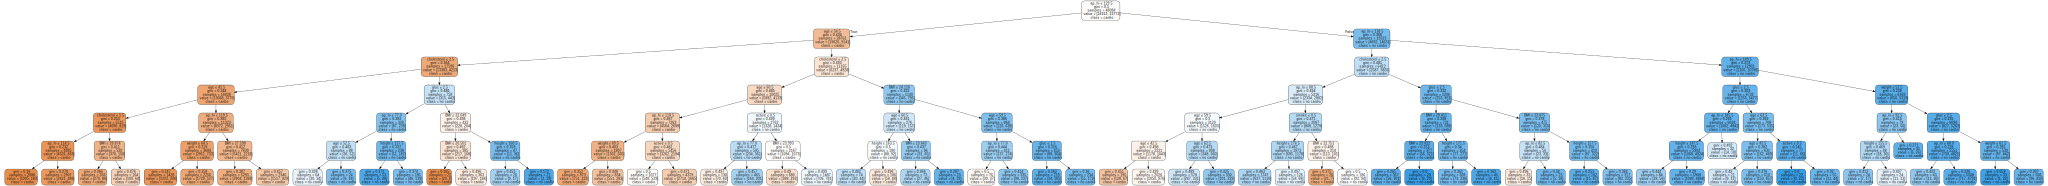

In [35]:
dot_graph = export_graphviz(dtr, 
                out_file=None, 
                feature_names=x_train.columns,
                class_names=['cardio', 'no cardio'],
                filled=True, rounded=True,
                special_characters=True
                )

tree_graph = graphviz.Source(dot_graph)
tree_graph

## 4 Results and Discussion <a name="results"></a>

We bulit two models to predict and the logistic model seems better. And we can draw some conclusion from these two models. There are the coefficients of the logistic model:

| age | gender | height | weight | ap_hi | ap_lo | cholesterol | gluc | smoke | alco | active | BMI |
| ------------- |:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| 0.04979299 | -0.01919647 | -0.03781909 | 0.04606342 | 0.05269945 | 0.01782537 | 0.48804562 | -0.11105226 | -0.13057066 | -0.18267992 | -0.23555175 | -0.09356248|

From the coefficients of the logistic model we can find out that there are several features which are positively correlated with CVD: 
age, weight, systolic blood pressure, diastolic blood pressure and cholesterol. These information tell us that we should pay attention to our health. If you have hypertension and you are no longer young, and maybe found yourself with high cholesterol from your medical report, you should really care about your heart and pay attention to CVD. 

And similarly, we can also find some interesting conclusion from the decision tree model. Young people with high cholesterol seem have greater chance to have CVD, which may be the new research topic.

## 5 Conclusion <a name="conclusion"></a>

We bulid two models to predict if a person have CVD, including logistic model and decision tree model. And doctors our yourself can use this model to predict whether you have CVD or not. **BUT THE RESULTS CANNOT REPLACE THE DOCTOR'S ADVICE！** These models only tell you may have more chance to have CVD and if you are predicted as no CVD, there is also a chance that you have CVD.

And we also draw some interestiong conclusions. If you have hypertension and you are no longer young, and maybe found yourself with high cholesterol from your medical report, you should really care about your heart and pay attention to CVD. And young people with high cholesterol seem have greater chance to have CVD. We may find more information from these models.

## 6 Reference <a name="reference"></a>

[1] https://en.wikipedia.org/wiki/Cardiovascular_disease

[2] https://www.kaggle.com/sulianova/cardiovascular-disease-dataset